In [1]:
import pandas as pd
import os

In [2]:
files= [file for file in os.listdir('./Sales_Data 2019')]

all_data= pd.DataFrame()

all_data= pd.concat(pd.read_csv('./Sales_Data 2019/'+file) for file in files)

In [3]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


cleaning data before apply some function on it

In [4]:
all_data[all_data.isna().any(axis =1)]

all_data = all_data.dropna(how= 'all')

In [5]:
all_data['months'] = all_data['Order Date'].str[0:2]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']

Adding months columns in the data

In [7]:
all_data['months'] = all_data['months'].astype('int32')

### Which month have maximum sales and how much?

Adding column have total price paid by user in order to buy that product

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
all_data['Total_price'] = all_data['Quantity Ordered']*all_data['Price Each']

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Total_price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
groupdat= all_data.groupby('months').sum()
groupdat.head()

,Quantity Ordered,Price Each,Total_price
months,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


Representing the above analysis using matplotlib 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

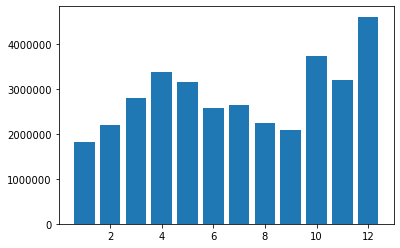

In [13]:
#bar plot
plt.bar(range(1,13), groupdat['Total_price'])
plt.ticklabel_format(useOffset=False , style= 'plain')
plt.show()

([<matplotlib.axis.XTick at 0x24abc6b0548>,
 <a list of 12 Text major ticklabel objects>)

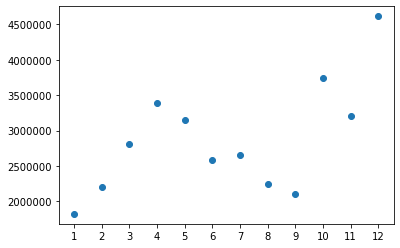

In [14]:
#scatter plot
plt.scatter(range(1,13) , groupdat['Total_price'])
plt.ticklabel_format(useOffset=False , style = 'plain')
plt.xticks(range(1,13))

### Which city have highest sales?


Adding city columns into data

In [15]:
all_data['City'] = all_data['Purchase Address'].apply(lambda s : s.split(',')[1])

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Total_price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [17]:
citygroup= all_data.groupby('City').sum()
citygroup

,Quantity Ordered,Price Each,months,Total_price
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


Text(0.5, 1.0, 'Sales per city')

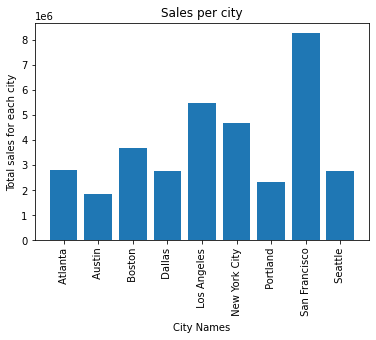

In [18]:
x= [city for city,df in all_data.groupby('City')]
y= pd.to_numeric(citygroup['Total_price'])
pd.options.display.float_format = '{:.4f}'.format
plt.bar(x, y)
plt.xticks(x, rotation= 'vertical')
plt.xlabel('City Names')
plt.ylabel('Total sales for each city')
plt.title('Sales per city')

([<matplotlib.axis.YTick at 0x24abe3354c8>,
 <a list of 9 Text major ticklabel objects>)

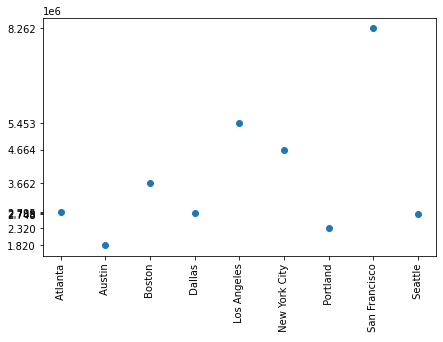

In [19]:
plt.scatter(x, citygroup['Total_price'])
plt.tight_layout()
plt.xticks(x, rotation= 'vertical')
pd.options.display.float_format = '{:.4f}'.format
plt.yticks(citygroup['Total_price'])


### At which time we should advertisment our product in order to increase sale of 

converting Order time in to datetime object

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [21]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [22]:
hourgroup= all_data.groupby('Hour')
hourgroup.count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Total_price,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0, 0.5, 'No. of orders')

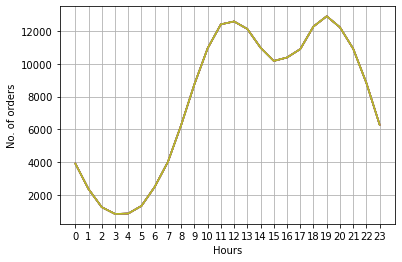

In [23]:
hour = [hour for hour , df in all_data.groupby('Hour')]
plt.plot(hour, all_data.groupby('Hour').count())
plt.grid()
plt.xlabel('Hours')
plt.xticks(hour)
plt.ylabel('No. of orders')

### What product are most oftenly sold together?

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Total_price,City,Hour
0,176558,USB-C Charging Cable,2,11.9500,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9000,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.9900,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.9900,Boston,22
3,176560,Google Phone,1,600.0000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0000,Los Angeles,14
4,176560,Wired Headphones,1,11.9900,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.9900,Los Angeles,14
5,176561,Wired Headphones,1,11.9900,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.9900,Los Angeles,9


In [28]:
dup = all_data[all_data['Order ID'].duplicated(keep = False)]
dup['Combine'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup = dup[['Order ID', 'Combine']].drop_duplicates()
dup.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Combine
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
from collections import Counter
from itertools import combinations
count = Counter()

for row in dup['Combine']:
    prod_list = row.split(',')
    count.update(Counter(combinations(prod_list, 2)))



In [38]:
for k ,v in count.most_common(50):
    print(k, ':' , v)

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92
('Lightning Charging Cable', 'Apple Airpods Headphones') : 81
('Vareebadd Phone', 'Bose SoundSport Headphones') : 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') : 77
('Apple Airpods Headphones', 'Wired Headphones') : 69
('Lightning Charging Cable', 'USB-C Charging Cable') : 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') : 55
('Lightning Charging Cable', 'Lightning Charging Cable') : 54
('Bose SoundSport Headphones', 'Wired Headphones') : 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') : 51
('A

#### what product sold the most ? And why?

In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Total_price,City,Hour
0,176558,USB-C Charging Cable,2,11.9500,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9000,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.9900,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.9900,Boston,22
3,176560,Google Phone,1,600.0000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0000,Los Angeles,14
4,176560,Wired Headphones,1,11.9900,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.9900,Los Angeles,14
5,176561,Wired Headphones,1,11.9900,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.9900,Los Angeles,9


In [59]:
grp = all_data.groupby('Product')
quan = grp.sum()
price = all_data.groupby("Product").mean()['Price Each']

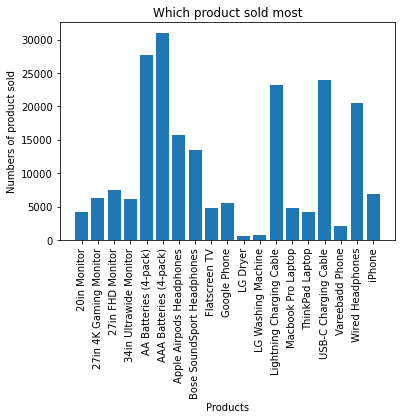

In [56]:
products = [product for product, df in grp]

plt.bar(products, quan['Quantity Ordered'])
plt.xticks(products , rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Numbers of product sold')
plt.title('Which product sold most')
plt.show()

#### Adding secoundary y axis in the matplotlib chart

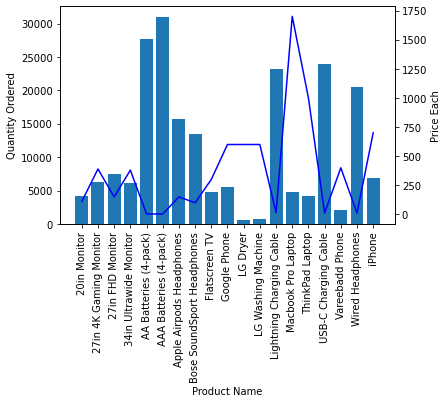

In [68]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()
ax1.bar(products , quan['Quantity Ordered'])
ax2.plot(products , price, 'b-')
ax1.set_xticklabels(products , rotation = 'vertical')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price Each')
plt.show()